# Classifying Heart Disease

The Heart Disease Data Set from the UCI Machine Learning Repository. This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

In [154]:
# Importing all necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [108]:
hrt = pd.read_csv('heart_disease.csv')

hrt.head() # Display the first few roles of the dataset

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [109]:
hrt.shape # Number of Observation & Features

(303, 15)

In [110]:
hrt.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [111]:
hrt.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

In [112]:
# checking for unwanted row in the dataset
acck = hrt[hrt['ca'] == '?']
#hrt['ca'].value_counts()

acck

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,167,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,193,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,288,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [113]:
attk = hrt[hrt['thal'] == '?']

#hrt['thal'].value_counts()
attk

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,88,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,267,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1


/tmp/ipykernel_498/243992386.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hrt.hist(ax=ax)


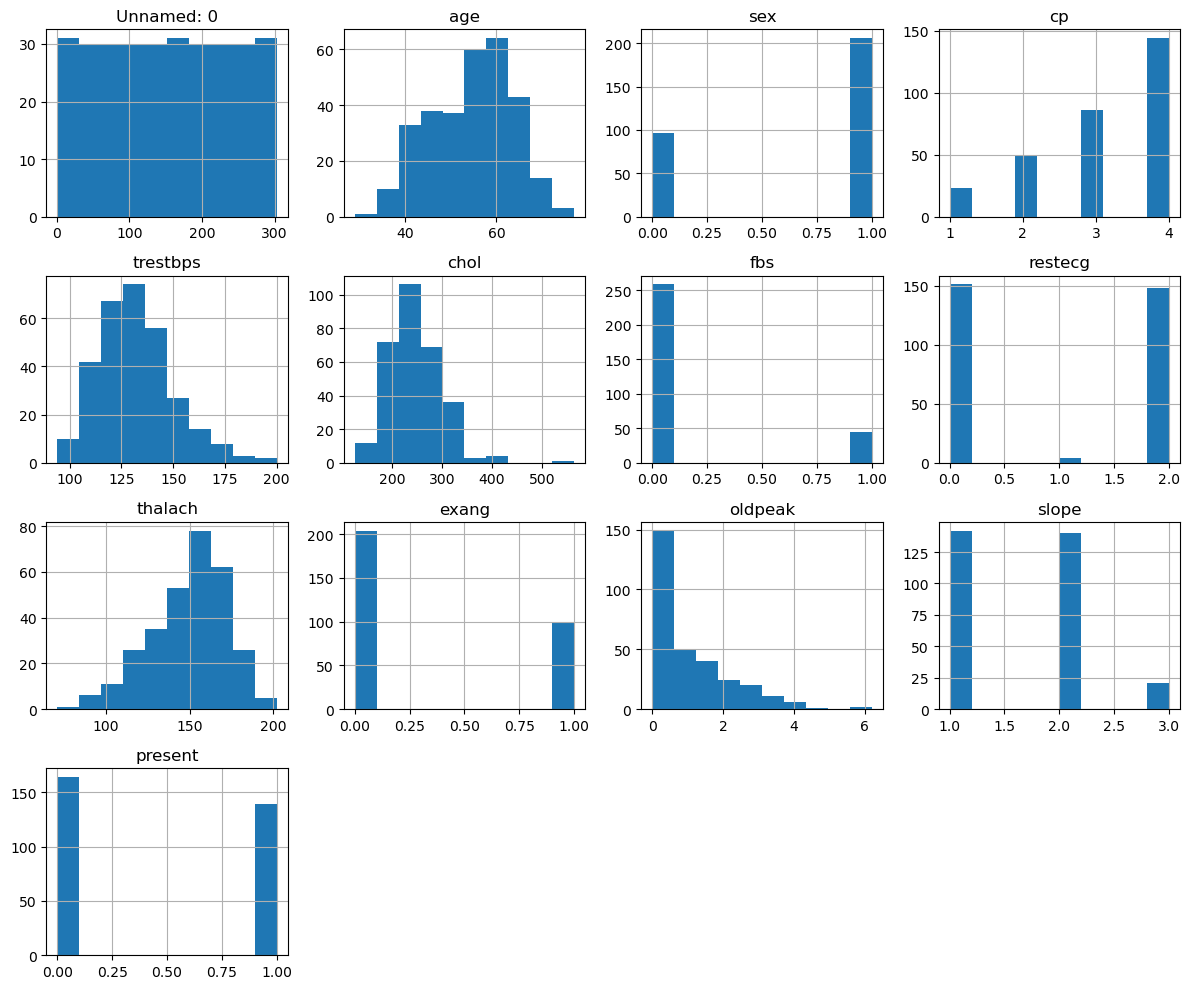

In [114]:
# Checking out their relationship with the help of an histogram
fig, ax = plt.subplots(figsize=(12, 10))
hrt.hist(ax=ax)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'present'}, xlabel='sex'>

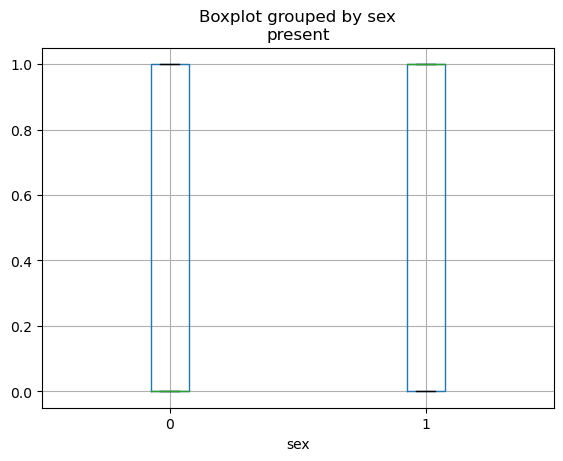

In [115]:
hrt.boxplot(column = ["present"], by = "sex")

<AxesSubplot:title={'center':'present'}, xlabel='cp'>

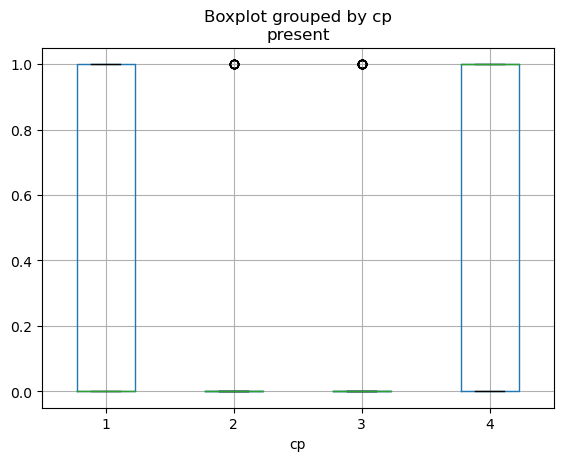

In [116]:
hrt.boxplot(column = ["present"], by = "cp")

In [117]:
hrt_df = hrt.copy()

In [118]:
hrt_df = hrt_df.drop('Unnamed: 0', axis=1)
#dropping unwanted column in the dataset

In [119]:
hrt_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [120]:
# Checking out their relationship with the help of an histogram

rmrow = hrt_df[hrt_df['thal'] == '?'].index
rmrow2 = hrt_df[hrt_df['ca'] == '?'].index
hrt_df.drop(rmrow, inplace=True)
hrt_df.drop(rmrow2, inplace=True)

hrt_df['thal'].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [121]:
# COnverting the two object columns to floats

hrt_df['thal'] = hrt_df['thal'].astype('float64')
hrt_df['ca'] = hrt_df['ca'].astype('float64')

In [122]:
hrt_df['ca'].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [159]:
# Checking for potential predictors and selecting the features with large difference 
# when stratified by predictors. Based on the differences and some knowledge 
# about heart disease

mean_df = hrt_df.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)

diff = abs(mean_df.iloc[0] - mean_df.iloc[1])

predictors = diff.sort_values(ascending=False).index[:5]

predictors

Index(['thalach', 'chol', 'trestbps', 'age', 'thal'], dtype='object')

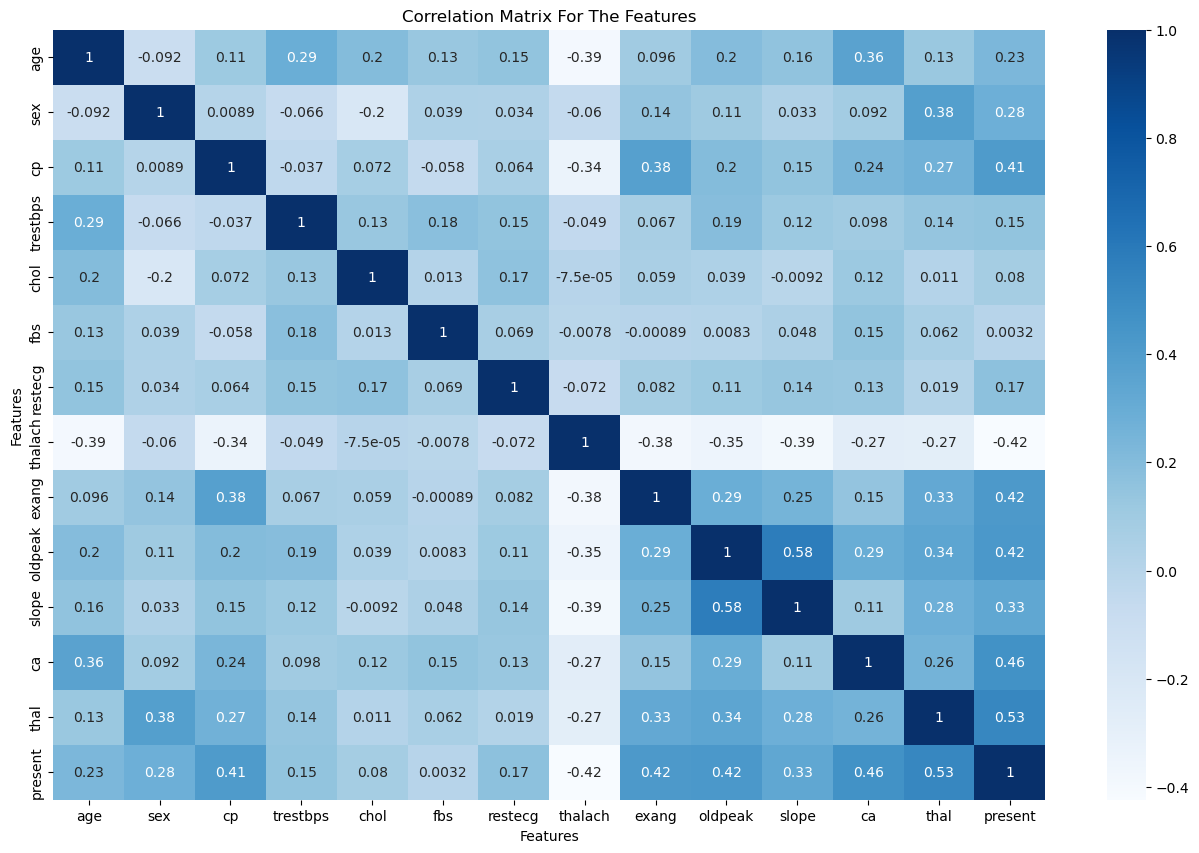

In [145]:
correlation_matrix = hrt_df.corr()

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix For The Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [148]:
high_corr = correlation_matrix['present'].sort_values(ascending=False).index[1:]

high_corr

Index(['thal', 'ca', 'oldpeak', 'exang', 'cp', 'slope', 'sex', 'age',
       'restecg', 'trestbps', 'chol', 'fbs', 'thalach'],
      dtype='object')

In [152]:
# Spliting the dataset into 70% training and 30% testing

X = hrt_df[predictors]
y = hrt_df['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [153]:
# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

# We confirm above that there are both cases and non-cases in both the 
# training and test sets

Y_train:  111
Y_train:  96
Y_test:  49
Y_test:  41


In [155]:
# Constructing a Logistic regression model with the training set

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [156]:
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.782608695652174
Training Sensitivity:  0.7604166666666666
Training Specificity:  0.8018018018018018


Overall the training accuracy was about 78%, the sensitivity was 76%, and the specificity was 80%. Based on these metrics, the model seems to perform better for non-cases.

## Interpreting The Model Coefficients

In [157]:
# Checking in terms of log-odds
for coef, val  in zip(predictors, model.coef_[0]):
    print(coef, ":", round(val, 2))

thalach : -0.04
chol : 0.0
trestbps : 0.02
age : 0.01
thal : 0.58


In [160]:
# Checking in terms of odds
for coef, val  in zip(predictors, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

thalach : 0.96
chol : 1.0
trestbps : 1.02
age : 1.01
thal : 1.79


Higher age and chol are associated with higher odds of heart disease holding the other predictors constant, they seems to be moderate and high and maximum heart rate. thalach and thal are associated with lower odds of heart disease holding the other predictors constant, but this odds ratios is close to 1.

In [161]:

# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.7555555555555555
Test Sensitivity:  0.8048780487804879
Test Specificity:  0.7142857142857143


Test accuracy was 75%, sensitivity was 80%, and specificity was 71%. Compared to the training set, the accuracy didn't change much, while the model fared better with cases and worse with non-cases. This is potentially useful since this application is health-based. We might be more interested in being better at identifying cases than non-cases.